In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('classification.csv')
df.head()

,age,interest,success
0,23.657801,18.859917,0.0
1,22.573729,17.969223,0.0
2,32.553424,29.463651,0.0
3,6.718035,25.704665,1.0
4,14.401919,16.770856,0.0


In [3]:
df['success'] = df.success.astype('int')

In [4]:
x = df.iloc[:,:2].values
y = df.iloc[:,-1].values

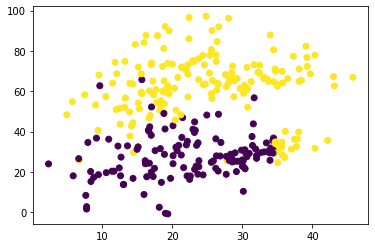

In [5]:
plt.scatter(x[:,0],x[:,1],c=y)

In [6]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(x,y)

LogisticRegression()

<AxesSubplot:>

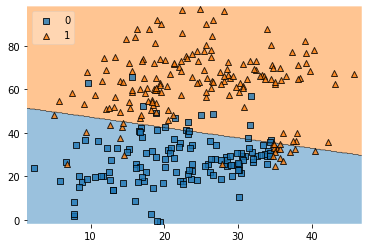

In [7]:
from mlxtend.plotting import plot_decision_regions
plot_decision_regions(x,y,lr,legend=2)

In [8]:
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(degree=3,include_bias=False)
x_trf = poly.fit_transform(x)

In [9]:
def plot_decision_boundry(x,y,degree=1):
    poly = PolynomialFeatures(degree=degree)
    x_trf = poly.fit_transform(x)
    
    lr1 = LogisticRegression()
    lr1.fit(x_trf,y)
    
    a = np.arange(x[:,0].min()-1,x[:,0].max()+1,0.01)
    b = np.arange(x[:,1].min()-1,x[:,1].max()+1,0.01)
    
    xx,yy = np.meshgrid(a,b)
    input_array = np.array([xx.ravel(),yy.ravel()]).T
    labels = lr1.predict(poly.transform(input_array))
    
    plt.contourf(xx,yy,labels.reshape(xx.shape),alpha=0.5)
    plt.scatter(x[:,0],x[:,1],c=y)

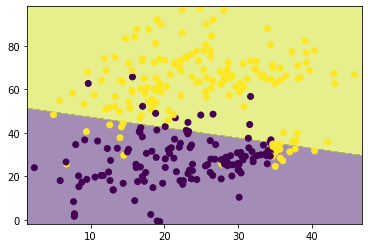

In [10]:
plot_decision_boundry(x,y)

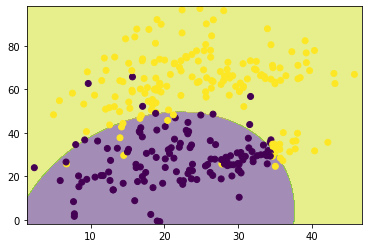

In [11]:
plot_decision_boundry(x,y,degree = 2)